# Setup 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import plotly.express as px #for 3D viz, easier than matplotlib

In [14]:
X, y = datasets.make_blobs(n_features = 3, n_samples = 100, random_state = 2)

In [15]:
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], color=y)
fig.show()

# Principal Component Analysis

Find a new number of dimensions(principal components) that preserves the maximum amount of variance.

Variance

$$
Var(X) = \frac{1}{m}\sum_{i=1}^{m}(X_{i} - X_{mean})^{2}
$$

Convariance matrix

$$
Cov(X,y) = \frac{1}{m}\sum_{i=1}^{m}(X_{i} - X_{mean})(y_{i} - y_{mean})^{T}\\
Cov(X,X) = \frac{1}{m}\sum_{i=1}^{m}(X_{i} - X_{mean})(X_{i} - X_{mean})^{T}
$$

Eigenvectors

$$
Av = \lambda v
$$

In [19]:
n_components = 2

In [20]:
#1. substract mean
X = X - np.mean(X, axis = 0)

#2. calculate Cov(X,X)
cov = np.cov(X.T)

#3. get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov)

#4. sort eigenvectors by eigenvalues in decreasing order
idxs = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors.T[idxs]

#5. choosen number of eigenvectors(principal components)
components = eigenvectors[0:n_components]

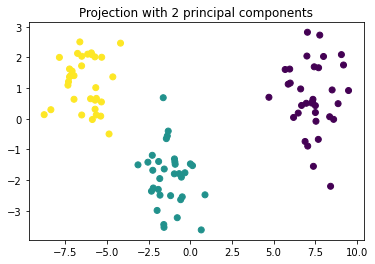

In [21]:
X_projected = np.dot(X, components.T)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
plt.title(f"Projection with {n_components} principal components")
plt.show()